In [3]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [4]:
df = pd.read_csv("C:/Users/VANISHA CHOUDHARY/Downloads/archive/StudentPerformanceFactors.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [11]:
df.shape

(6607, 20)

In [19]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [7]:
df.tail()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68
6606,15,67,Medium,Low,Yes,9,94,Medium,Yes,0,Medium,Medium,Public,Positive,4,No,Postgraduate,Near,Male,64


In [17]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [19]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [15]:
# Detecting outliers using IQR method
df_cleaned = df.dropna() 
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns:", numerical_columns)
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)  # First quartile (25%)
    Q3 = df[col].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1                # Interquartile range
    
    lower_bound = Q1 - 1.5 * IQR  # Lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers
    
    
    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]
    
    print(f'Outliers in {col}:')
    print(outliers[[col]])


Numerical columns: Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')
Outliers in Hours_Studied:
      Hours_Studied
209              43
262               1
478              38
1061              3
1101              3
1539              3
1615             39
1957             39
2024              2
2035             37
2305             39
2506             38
2521             38
2895             44
2947              2
3017              3
3152              3
3241             37
3454              2
3716             39
3982             39
4033              3
4047             37
4198              2
4207              3
4617              3
4635              3
4639              3
4725              1
4779              1
4784             37
4870             38
5157             38
5224             38
5642              3
5673             37
5796             39
5846             38
5907            

In [18]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

for col in categorical_cols:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")

Value counts for Parental_Involvement:
Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64


Value counts for Access_to_Resources:
Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64


Value counts for Extracurricular_Activities:
Extracurricular_Activities
Yes    3938
No     2669
Name: count, dtype: int64


Value counts for Motivation_Level:
Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64


Value counts for Internet_Access:
Internet_Access
Yes    6108
No      499
Name: count, dtype: int64


Value counts for Family_Income:
Family_Income
Low       2672
Medium    2666
High      1269
Name: count, dtype: int64


Value counts for Teacher_Quality:
Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64


Value counts for School_Type:
School_Type
Public     4598
Private    2009
Name: count, dtype: int64


Value counts for Peer_Influence:
Peer_Inf

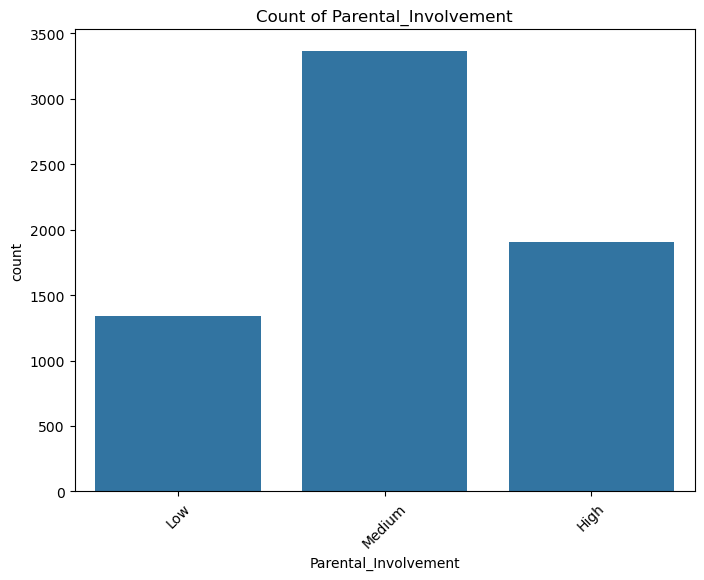

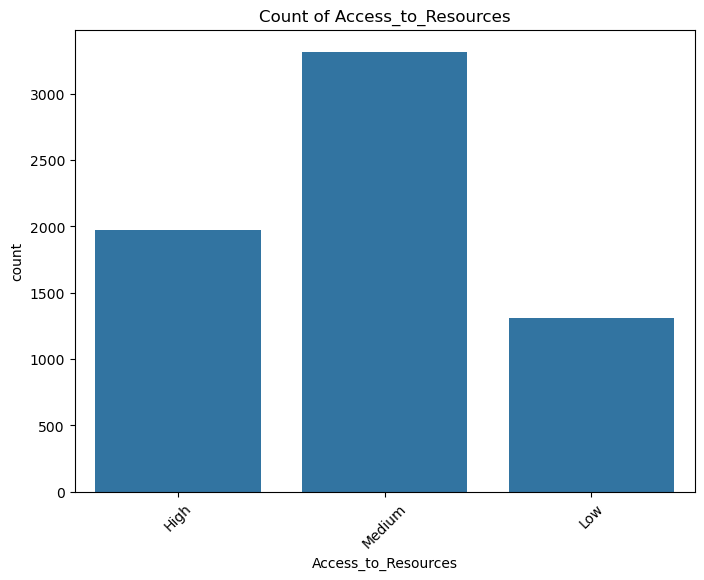

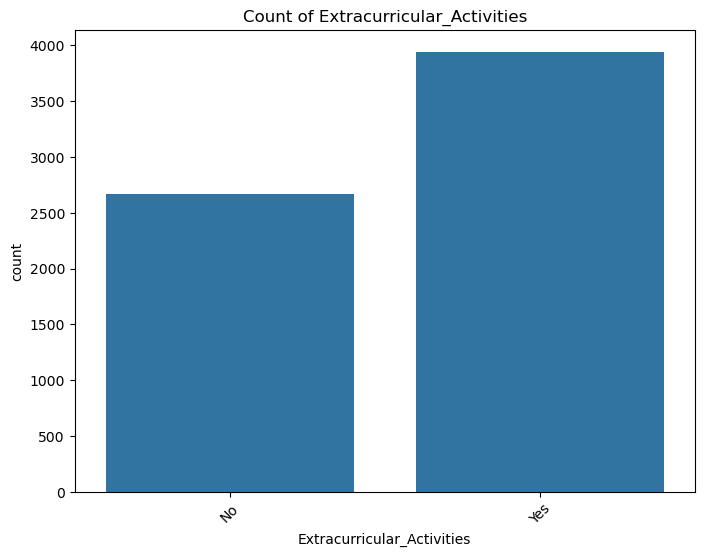

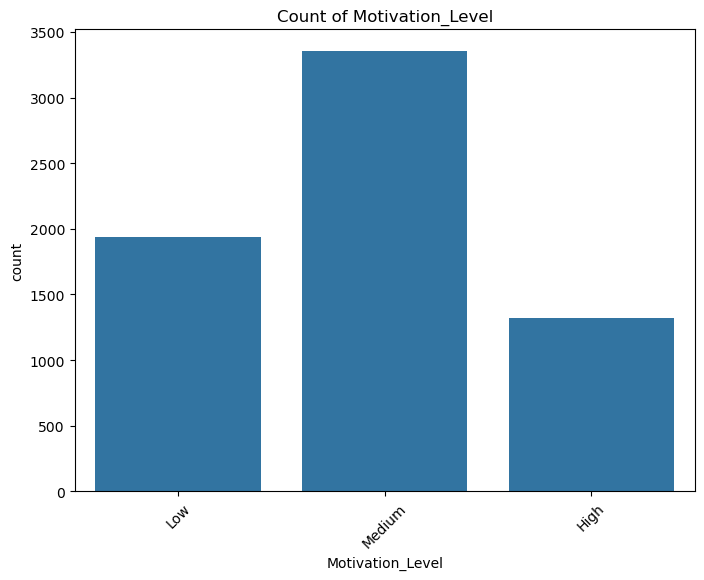

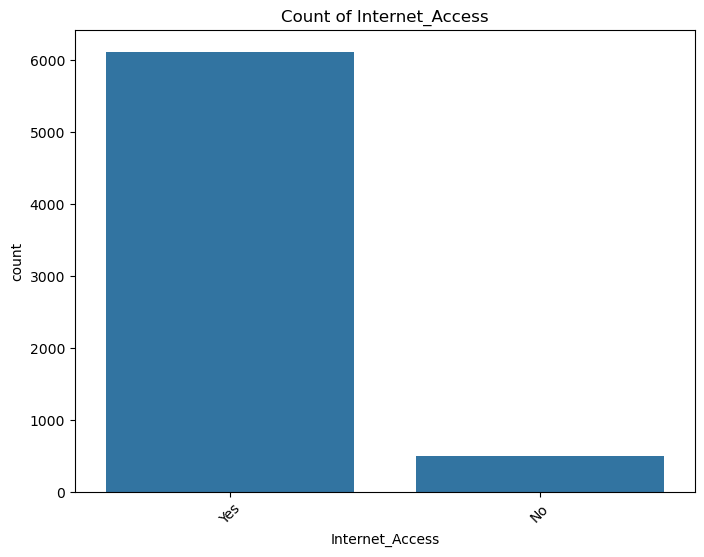

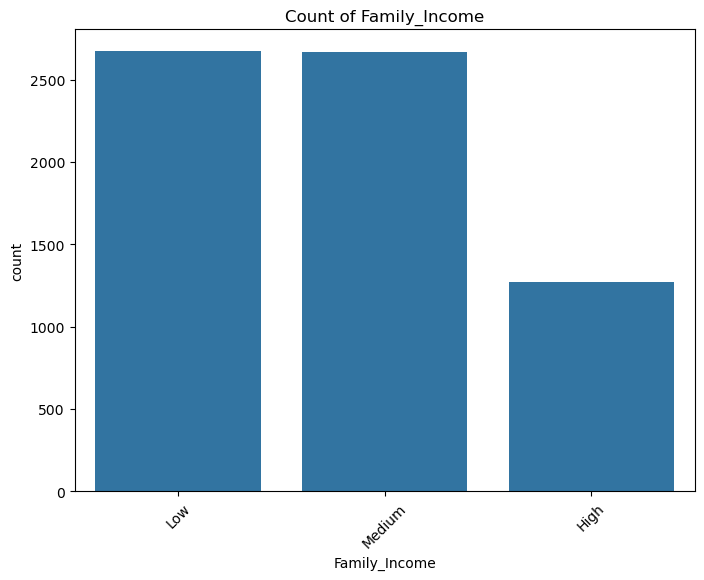

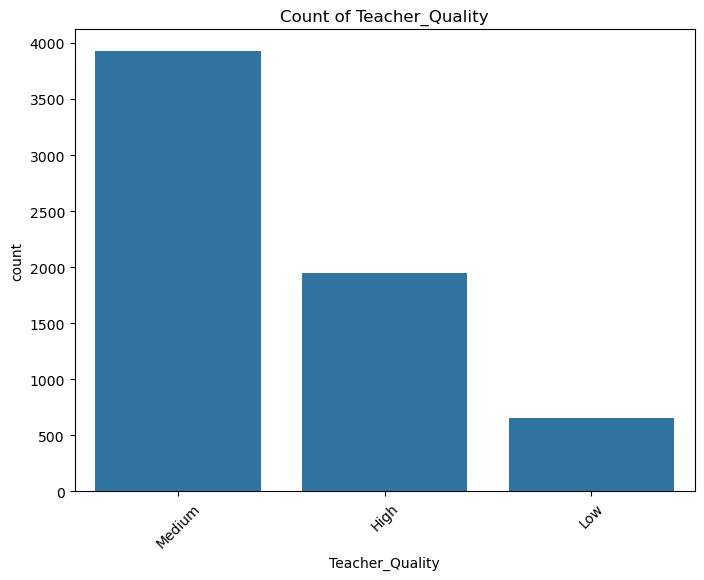

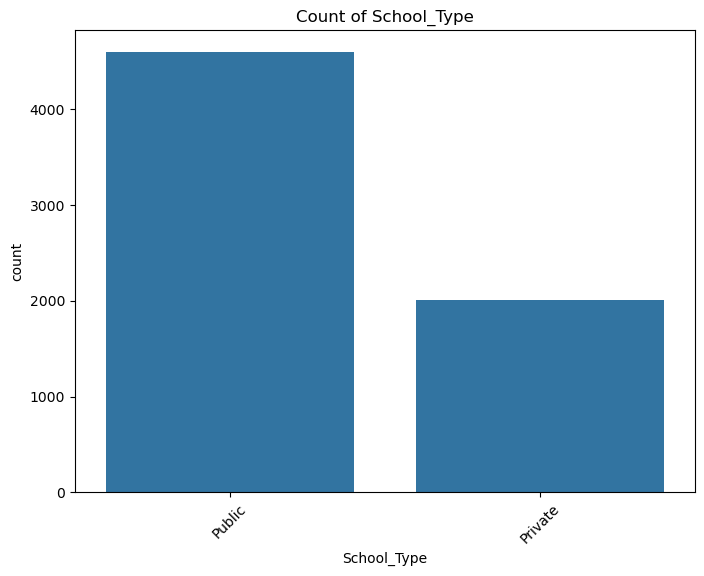

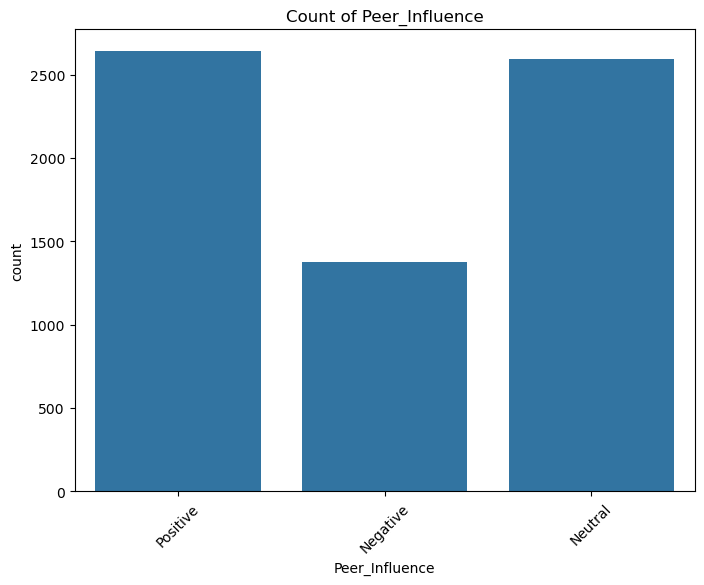

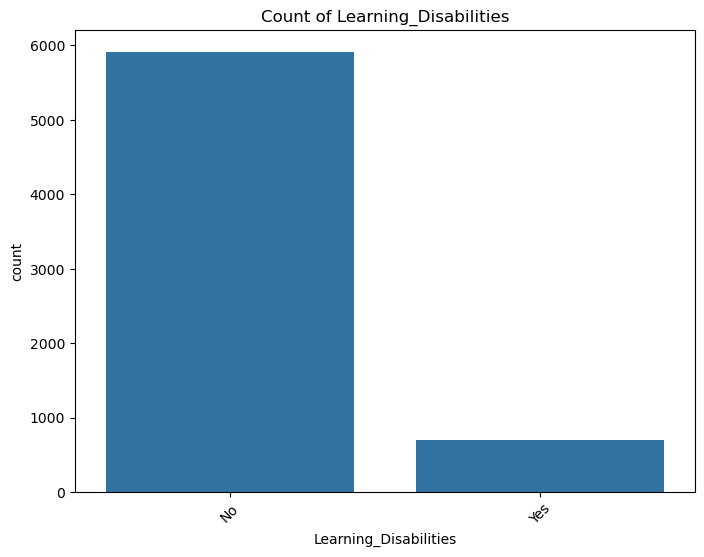

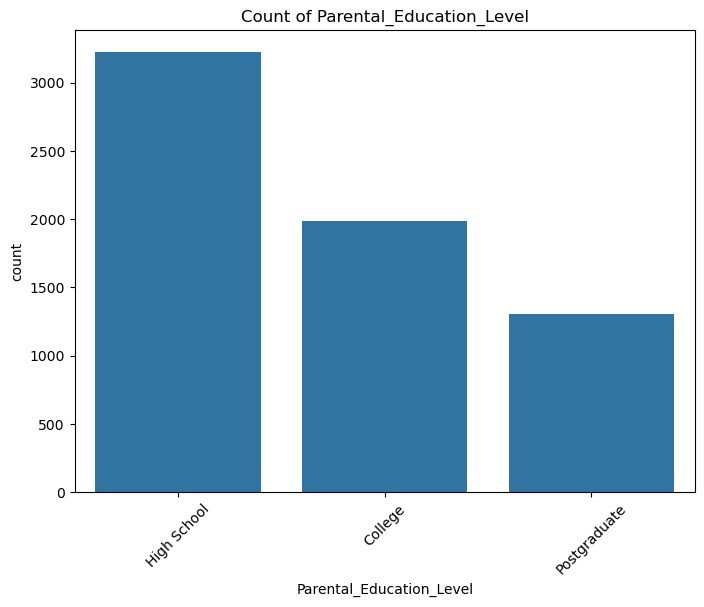

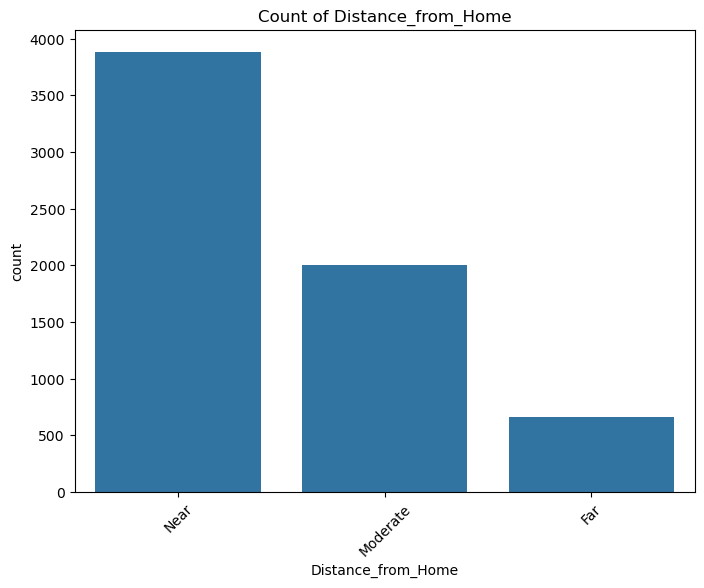

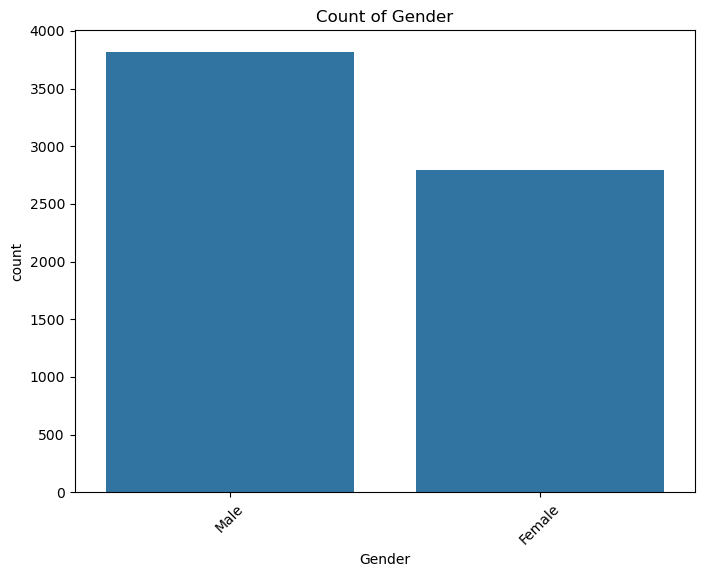

In [20]:
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()

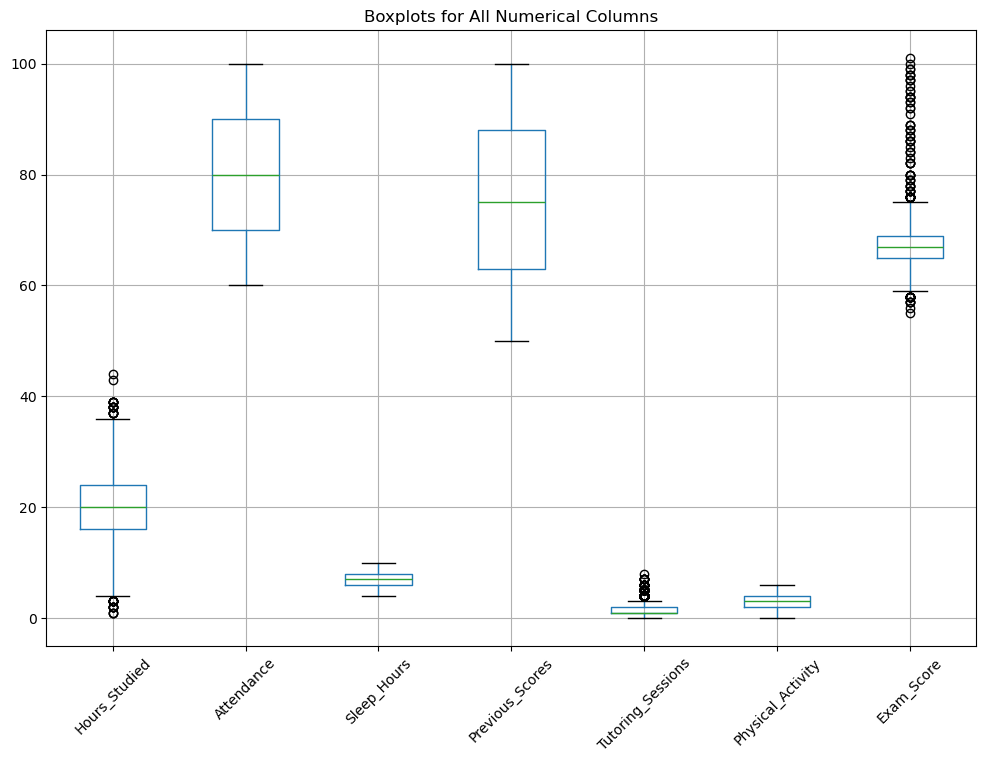

In [22]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Plot boxplots for each numerical column
plt.figure(figsize=(12, 8))
df[numerical_cols].boxplot()
plt.title('Boxplots for All Numerical Columns')
plt.xticks(rotation=45)  # Rotate column labels if needed
plt.show()

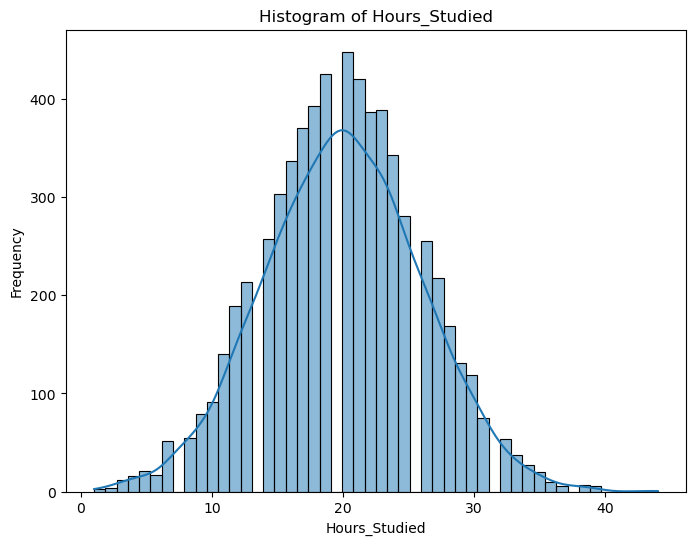

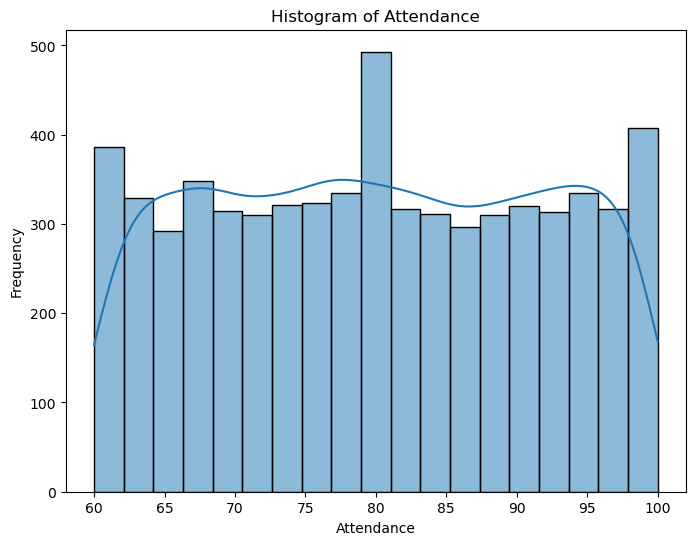

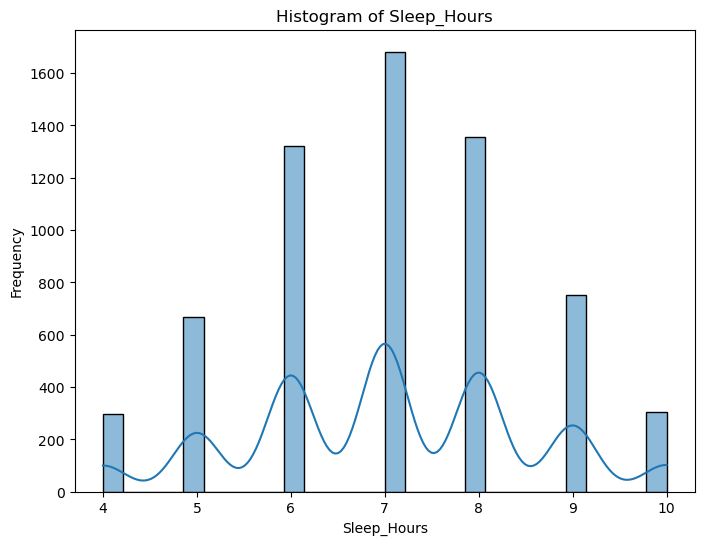

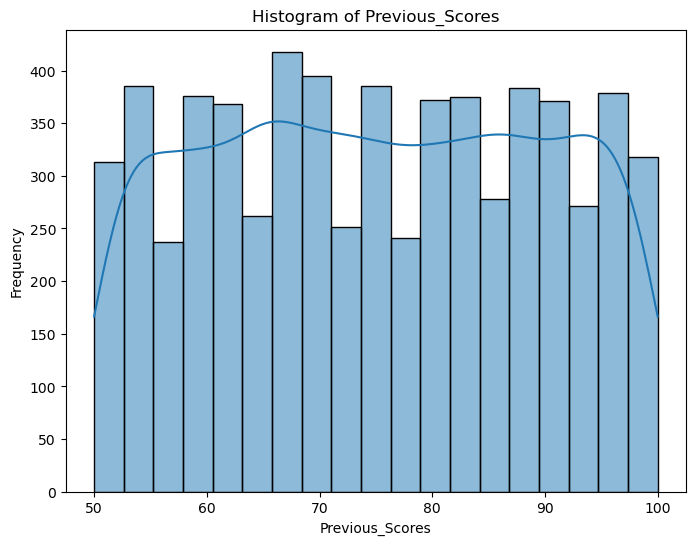

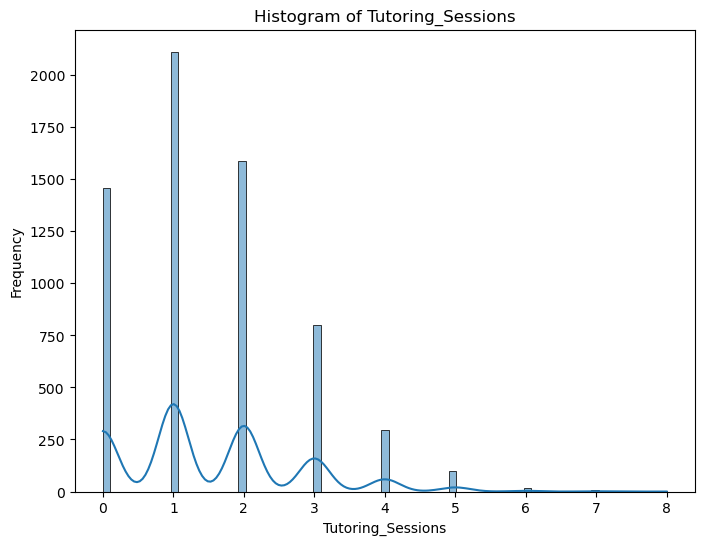

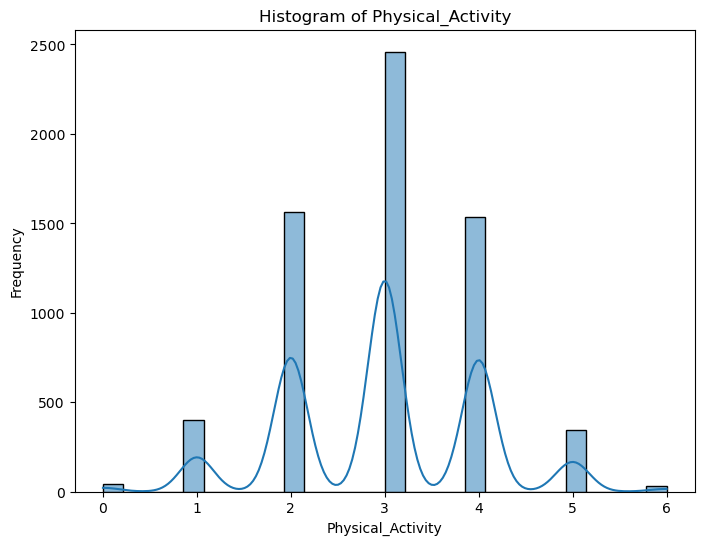

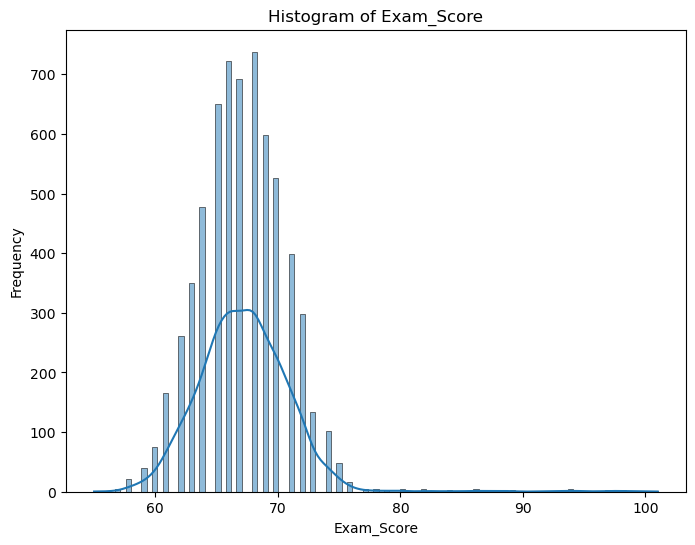

In [19]:
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_cleaned[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Bivariate Analysis

Numerical columns: Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')


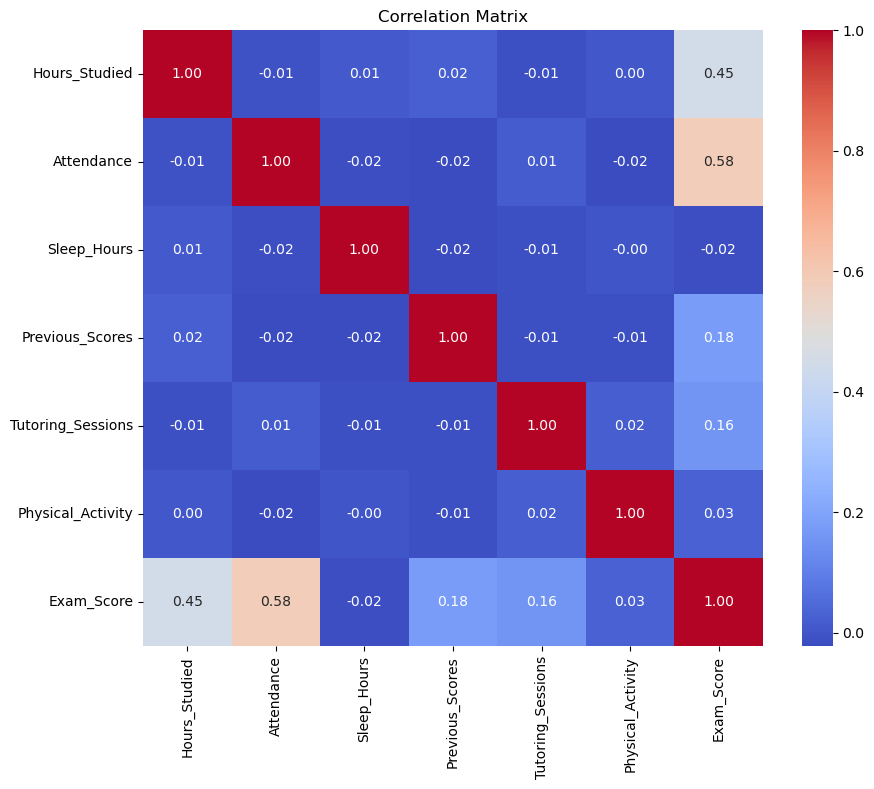

In [9]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns:", numerical_columns)
corr_matrix = df[numerical_columns].corr()

# Plotting the heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [28]:
# Categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_columns)

# Numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns:", numerical_columns)


Categorical columns: Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')
Numerical columns: Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')


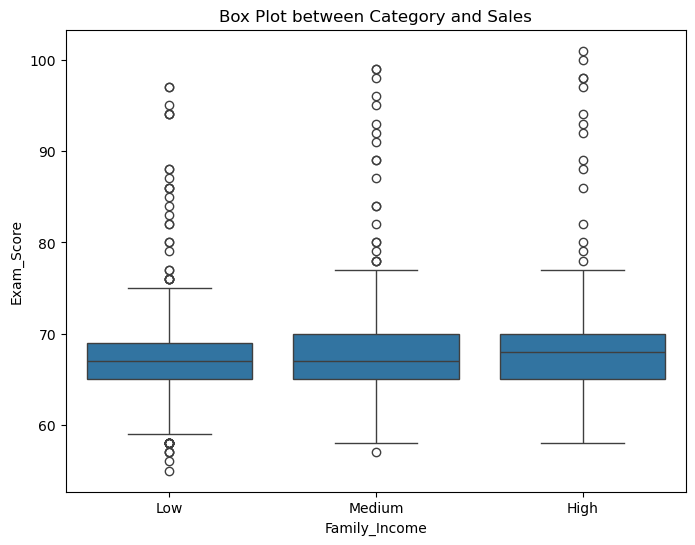

In [32]:
# Replace 'Category' and 'Sales' with actual column names from your dataset
plt.figure(figsize=(8, 6))
sns.boxplot(x='Family_Income', y='Exam_Score', data=df)
plt.title('Box Plot between Category and Sales')
plt.xlabel('Family_Income')
plt.ylabel('Exam_Score')
plt.show()


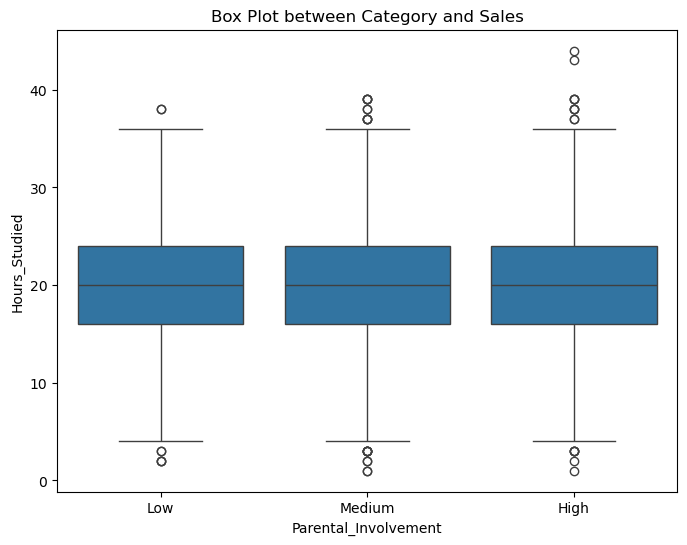

In [34]:
# Replace 'Category' and 'Sales' with actual column names from your dataset
plt.figure(figsize=(8, 6))
sns.boxplot(x='Parental_Involvement', y='Hours_Studied', data=df)
plt.title('Box Plot between Category and Sales')
plt.xlabel('Parental_Involvement')
plt.ylabel('Hours_Studied')
plt.show()
